# Stock Prices Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be analyzing stock prices of some big tech companies such as APPLE, MICROSOFT, GOOGLE and AMAZON. We will try to find some trends between the stock prices based on their time attached values. We will especially deal with the
total stock prices of the companies, closing prices of the stocks and daily price changes, correlation between the stock values of these big tech companies and some stock value risk analysis etc.

Our stock price data is information about the current and historical price of a share of stock. Investors and traders may use it to estimate a company's worth and to analyze the demand and supply of a share.

**Variable Descriptions:**  

**date**: Date of the stock, **open**: Open price of the stock, **high**: The highest value of the stock on the relevant date, **low**: The lowest value of the stock on the relevant date, **close**: Close price of the stock, **Volume**: The volume of the stock on the relevant date, **Name**: The name of the tech company

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#path='F:\EDA_projects\Stock_Data\individual_stocks_5yr\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOGL_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
stocks_data = pd.DataFrame()
for file in company_list:
    #current_df = pd.read_csv(path+"/"+file)
    current_df=pd.read_csv(file)
    stocks_data = pd.concat([stocks_data, current_df])
stocks_data.shape

(5036, 7)

In [ ]:
stocks_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [ ]:
stocks_data['Name'].unique() #Checking the company names

array(['AAPL', 'GOOGL', 'MSFT', 'AMZN'], dtype=object)

In [ ]:
stocks_data.describe()

open         high          low        close        volume
count  5036.000000  5036.000000  5036.000000  5036.000000  5.036000e+03
mean    354.826532   357.691781   351.644323   354.810917  2.352633e+07
std     326.094833   328.544910   323.293305   326.079126  2.908998e+07
min      27.350000    27.600000    27.230000    27.370000  5.211410e+05
25%      70.537500    71.058875    69.869750    70.381200  2.642110e+06
50%     214.155000   216.515000   212.000000   213.745000  1.264079e+07
75%     586.012675   589.509725   579.702350   584.695000  3.472027e+07
max    1477.390000  1498.000000  1450.040000  1450.890000  2.668336e+08

### Data Cleaning

In [ ]:
stocks_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [ ]:
stocks_data['date']=pd.to_datetime(stocks_data['date'])
stocks_data['date'][0]

0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [ ]:
stocks_data.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

We don't have any null values in our dataframe. Let's begin our "Exploratory Data Analysis".

<a id='eda'></a>

### Exploratory Data Analysis

##### Analyzing The Closing Price of All The Stocks

In [ ]:
stocks_data.head()

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [ ]:
tech_list = stocks_data['Name'].unique()
tech_list

array(['AAPL', 'GOOGL', 'MSFT', 'AMZN'], dtype=object)

In [ ]:
for i, company in enumerate(tech_list,1):
    print(i,company)

1 AAPL
2 GOOGL
3 MSFT
4 AMZN


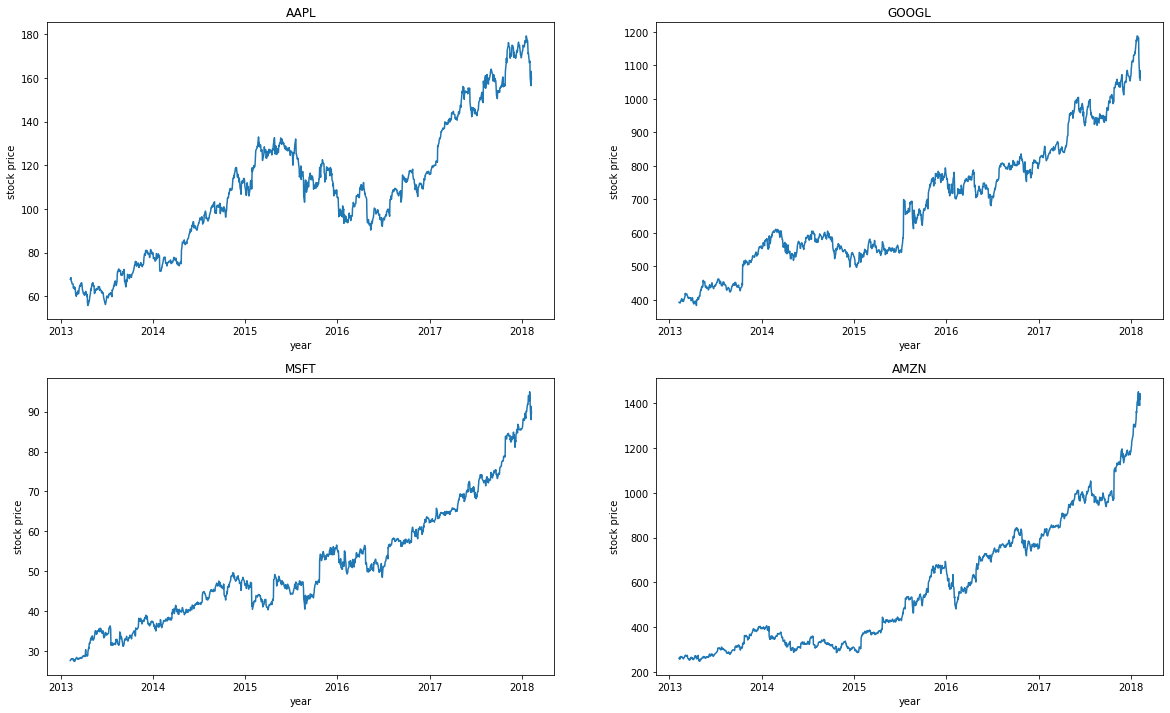

In [ ]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=stocks_data[stocks_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xlabel('year')
    plt.ylabel('stock price')
    plt.title(company)

Regarding the closing prices of the stocks, we see that all the values show downward trends. When we compare the most valuable stock at this level Amazon' s stock price is the highest. (Approximately around 1400 usd)

##### Analyzing The Total Volume Of Stocks Being Traded Each Day

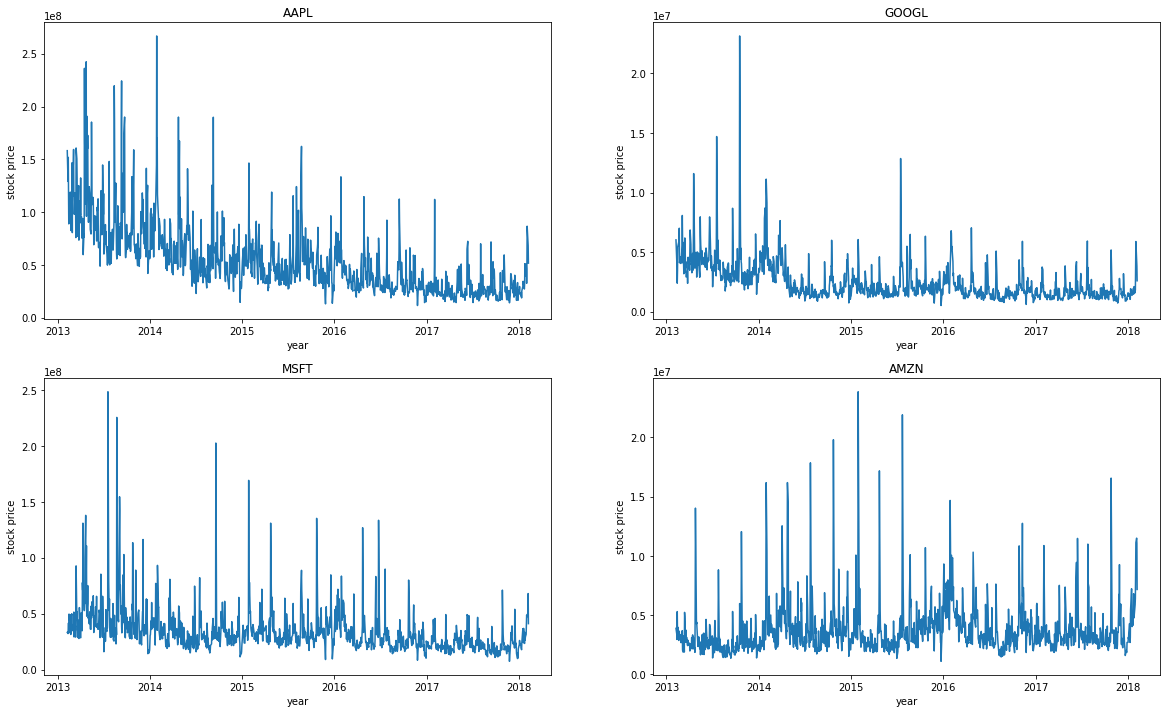

In [ ]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=stocks_data[stocks_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.xlabel('year')
    plt.ylabel('stock price')
    plt.title(company)

In [ ]:
import plotly.express as px
for company in (tech_list):
    df=stocks_data[stocks_data['Name']==company]
    fig=px.line(df, x="date", y="volume")
    fig.update_layout(title_text=company, title_x=0.5)
    fig.show()

In spite of the fact that Apple stocks are not the cheapest stocks in our tech stocks list, when we check the volumes of the stocks according to our graphs we see that the highest volumes belong to the Apple stocks in the last periods.

##### Analyzing The Daily Price Change In Apple Stock

We need to calculate the daily Apple stock return formula that is, how much you gained or lost per day for a stock. We will subtract the opening price from the closing price and then multiply the result by the number of shares we own in the company.

In [ ]:
df_apple=pd.read_csv('AAPL_data.csv')
df_apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [ ]:
#Calculating the percentage return
df_apple['1day % return']=((df_apple['close']-df_apple['open'])/df_apple['close'])*100
df_apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   1day % return  
0       0.206325  
1       0.714688  
2      -2.481344  
3      -0.042869  
4       0.443624

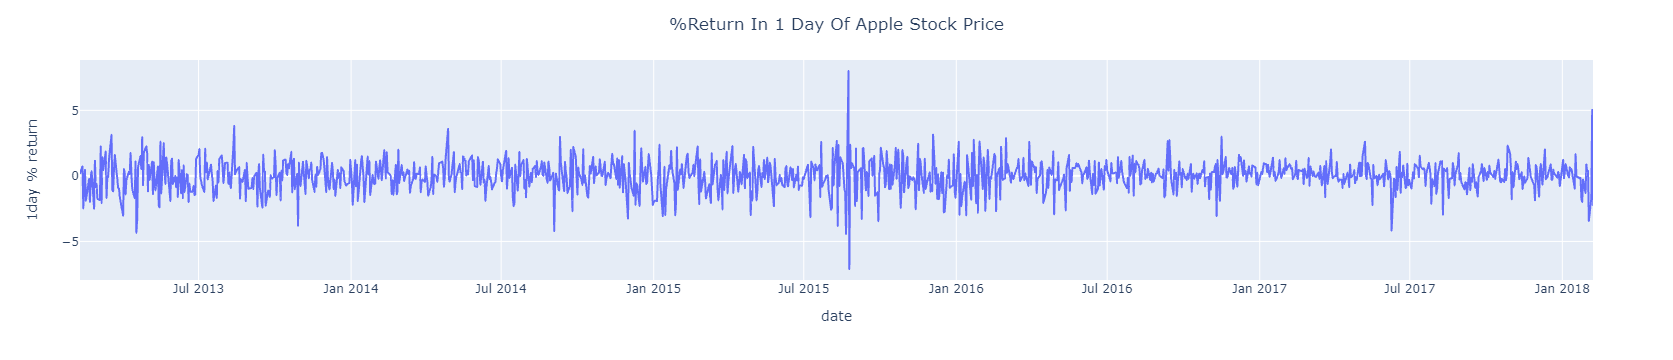

In [ ]:
import plotly.express as px
fig = px.line(df_apple, x="date", y="1day % return")
fig.update_layout(title_text='%Return In 1 Day Of Apple Stock Price', title_x=0.5)
fig.show()

In [ ]:
df_apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   1day % return  
0       0.206325  
1       0.714688  
2      -2.481344  
3      -0.042869  
4       0.443624

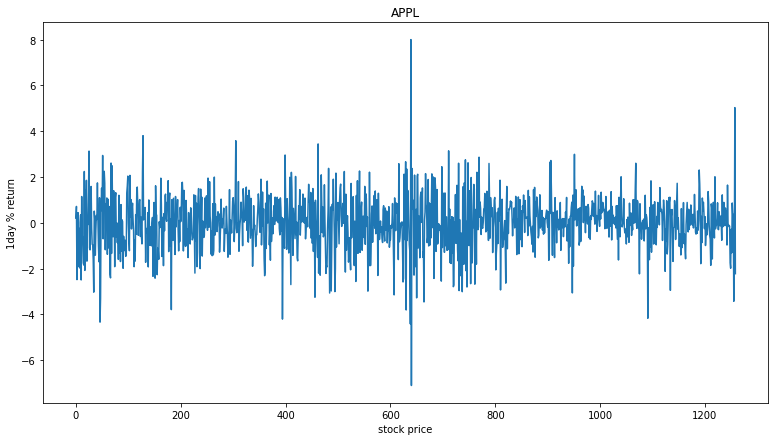

In [ ]:
#Using matplotlib for visualisation
plt.figure(figsize=(13,7))
df_apple['1day % return'].plot()
plt.xlabel('stock price')
plt.ylabel('1day % return')
plt.title('APPL');

In these plots we can clearly see that the highest 1day % returns of the stock prices of Apple are on Aug 24, 2015 (Return rate is 8) and Feb 6, 2018 (Return rate is 5.02)

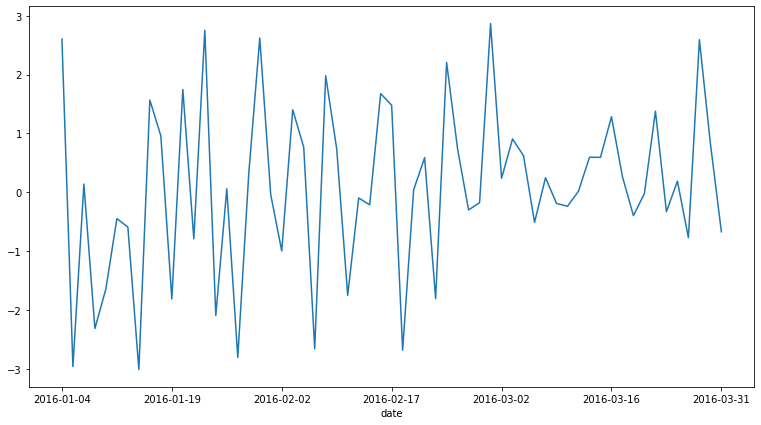

In [ ]:
#If we want to see the change in a specific interval
plt.figure(figsize=(13,7))
df_apple.set_index('date')['2016-01-01':'2016-03-31']['1day % return'].plot()
plt.xticks(rotation='0');

##### Analyzing Monthly and Yearly Mean of Apple Stock Close Value

In [ ]:
df_apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   1day % return  
0       0.206325  
1       0.714688  
2      -2.481344  
3      -0.042869  
4       0.443624

In [ ]:
df_apple['date']=pd.to_datetime(df_apple['date'])
df_apple.dtypes

date             datetime64[ns]
open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
1day % return           float64
dtype: object

In [ ]:
df_apple.set_index('date', inplace=True)
df_apple.head()

open     high      low    close     volume  Name  1day % return
date                                                                          
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       0.206325
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       0.714688
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      -2.481344
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      -0.042869
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       0.443624

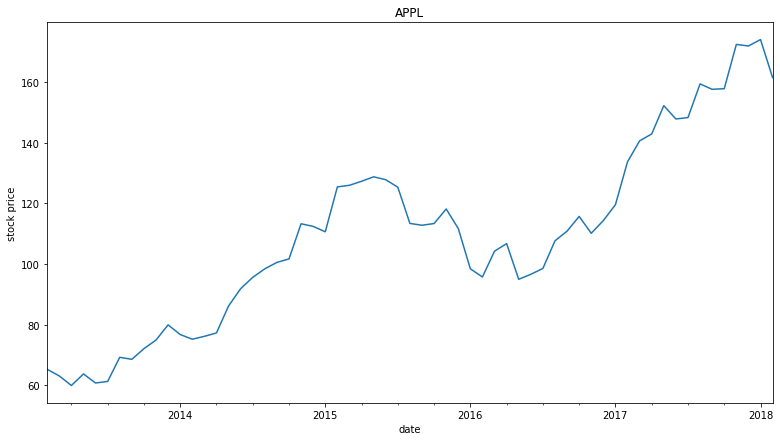

In [ ]:
#Plotting the monthly mean 
plt.figure(figsize=(13,7))
df_apple['close'].resample('M').mean().plot()
plt.xlabel('date')
plt.ylabel('stock price')
plt.title('APPL');

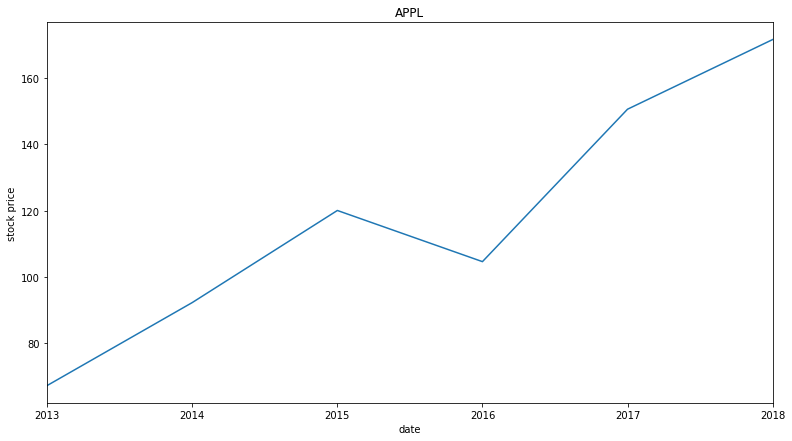

In [ ]:
#Plotting the yearly mean 
plt.figure(figsize=(13,7))
df_apple['close'].resample('Y').mean().plot()
plt.xlabel('date')
plt.ylabel('stock price')
plt.title('APPL');

According to our graphs we can see that the overall trend of Apple stock price is upward between 2013 and 2018. In both monthly and yearly mean periods we see that from 2015 to 2016 there is a kind of fluctuating decline of stock price. 
But although this does not last long, the upward trend is starting again after 2016.

##### Checking The Correlation Between The Stock Prices of These Tech Companies (Amazon,Apple,Google,Microsoft)

In [ ]:
#Reading the data of tech companies 
aapl=pd.read_csv('AAPL_data.csv')
googl=pd.read_csv('GOOGL_data.csv')
amzn=pd.read_csv('AMZN_data.csv')
msft=pd.read_csv('MSFT_data.csv')

In [ ]:
### create a blank dataframe
close=pd.DataFrame()

close['aapl']=aapl['close']
close['googl']=googl['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

close.head()

aapl     googl    amzn   msft
0  67.8542  393.0777  261.95  27.55
1  68.5614  391.6012  257.21  27.86
2  66.8428  390.7403  258.70  27.88
3  66.7156  391.8214  269.47  28.03
4  66.6556  394.3039  269.24  28.04

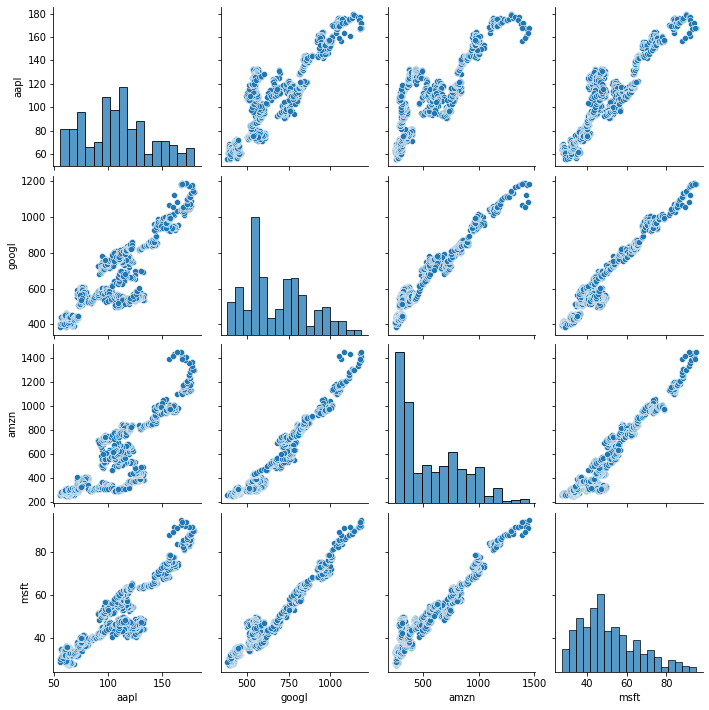

In [ ]:
#Creating a pairplot for multi-variate plot analysis
sns.pairplot(data=close)

<AxesSubplot:>

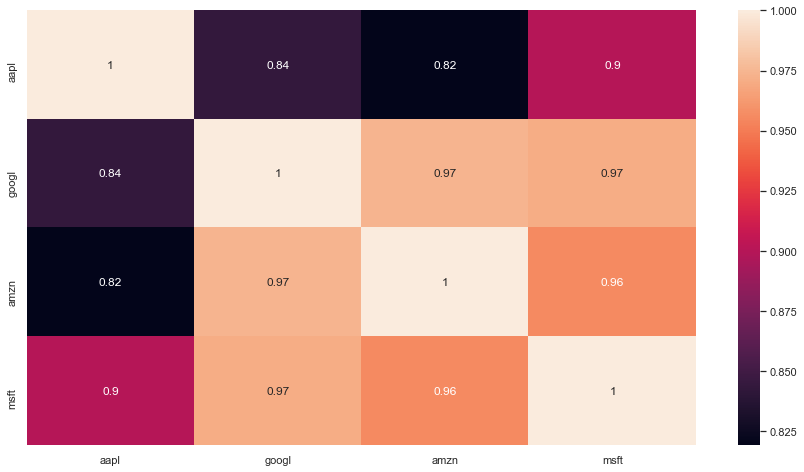

In [ ]:
#Checking the correlation plot for stock prices
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(close.corr(),annot=True)

In these plots we can clearly see that the closing price of stocks are well correlated and have a correlation of 0.97 between Google and Microsoft, 0.96 between Amazon and Microsoft, and 0.9 between Apple and Microsoft. 

##### Analyzing The Daily Return of Each Stock Price and How They Are Correlated 

In [ ]:
data_daily_return=pd.DataFrame()
data_daily_return.head()

Empty DataFrame
Columns: []
Index: []

In [ ]:
data_daily_return['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data_daily_return['goog_change']=((googl['close']-googl['open'])/googl['close'])*100
data_daily_return['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data_daily_return['msft_change']=((msft['close']-msft['open'])/msft['close'])*100
data_daily_return.head()

appl_change  goog_change  amzn_change  msft_change
0     0.206325     0.667196     0.209964     0.725953
1     0.714688     0.513788    -2.328836     0.753769
2    -2.481344    -0.134514    -0.189409     0.000000
3    -0.042869     0.348705     2.946525     0.356761
4     0.443624     1.026873     0.694548     0.427960

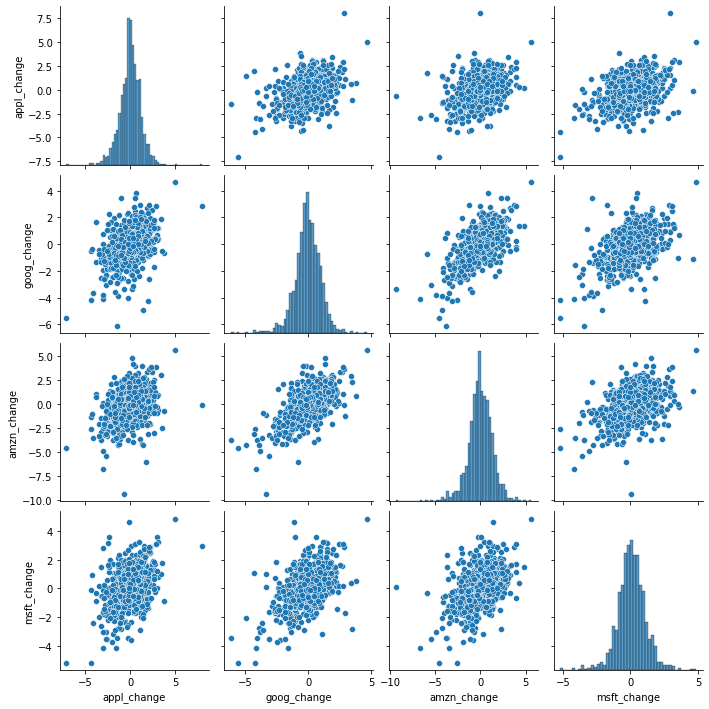

In [ ]:
#Creating a pairplot for multi-variate plot analysis
sns.pairplot(data=data_daily_return)

<AxesSubplot:>

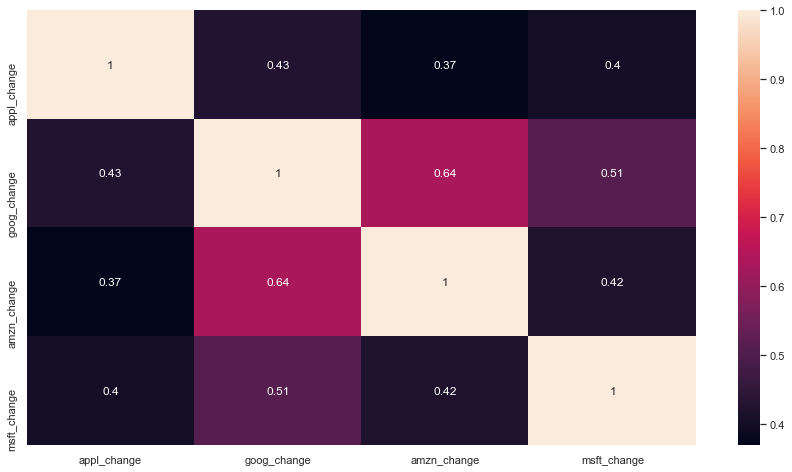

In [ ]:
#Checking the correlation plot for daily returns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_daily_return.corr(),annot=True)

In these plots we can see that Amazon and Google have good correlation on daily returns.

##### Analyzing The Value at Risk For Amazon and Google

In [ ]:
data_daily_return.head()

appl_change  goog_change  amzn_change  msft_change
0     0.206325     0.667196     0.209964     0.725953
1     0.714688     0.513788    -2.328836     0.753769
2    -2.481344    -0.134514    -0.189409     0.000000
3    -0.042869     0.348705     2.946525     0.356761
4     0.443624     1.026873     0.694548     0.427960

In [ ]:
df_risk=data_daily_return[['amzn_change','goog_change','msft_change','appl_change']]
df_risk.head()

amzn_change  goog_change  msft_change  appl_change
0     0.209964     0.667196     0.725953     0.206325
1    -2.328836     0.513788     0.753769     0.714688
2    -0.189409    -0.134514     0.000000    -2.481344
3     2.946525     0.348705     0.356761    -0.042869
4     0.694548     1.026873     0.427960     0.443624

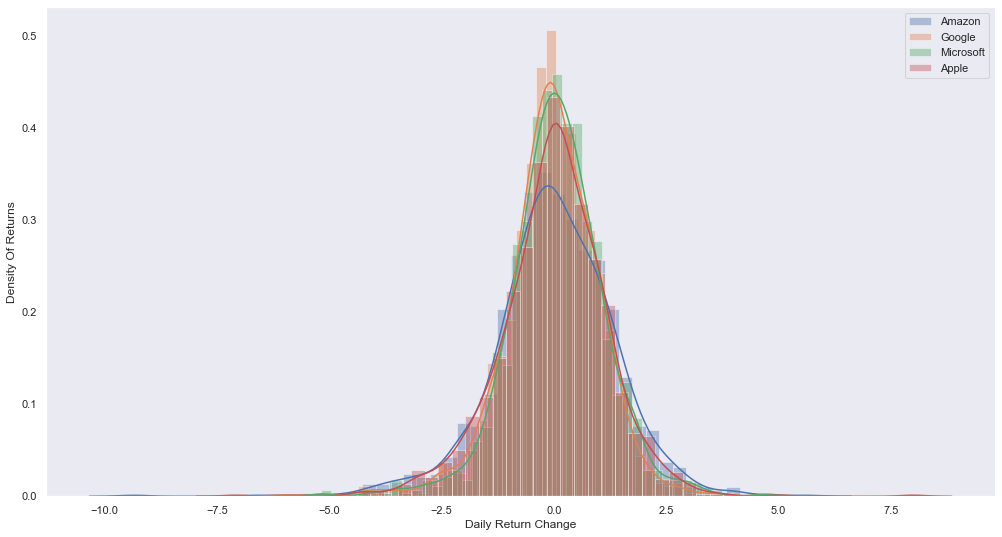

In [ ]:
plt.figure(figsize=(17,9))
sns.distplot(data_daily_return['amzn_change'],label='Amazon')
sns.distplot(data_daily_return['goog_change'],label='Google')
sns.distplot(data_daily_return['msft_change'],label='Microsoft')
sns.distplot(data_daily_return['appl_change'],label='Apple')
plt.xlabel('Daily Return Change')
plt.ylabel('Density Of Returns')
plt.grid(False)
plt.legend()
plt.show();

When we check the graph we see that it somehow follows a normal distribution for Google, Amazon, Microsoft and Apple. 

In [ ]:
#Calculating the standard deviations
data_daily_return['amzn_change'].std(), data_daily_return['goog_change'].std(),data_daily_return['msft_change'].std(),data_daily_return['appl_change'].std()

(1.3586786099495487, 1.052190772947712, 1.0592596018845353, 1.1871377131421237)

In [ ]:
#Calculating the 0.1 quantile
data_daily_return['amzn_change'].quantile(0.1), data_daily_return['goog_change'].quantile(0.1),data_daily_return['msft_change'].quantile(0.1),data_daily_return['appl_change'].quantile(0.1)

(-1.5247436499501366,
 -1.2411807904171945,
 -1.1385681979964504,
 -1.4246644227944307)

Based on our calculations we can say that 90% of the times the worst daily loss will not exceed 1.52 usd for Amazon, 1.24 usd for Google, 1.13 usd for Microsoft and 1.42 usd for Apple.

<a id='conclusions'></a>

### Conclusions

In this project we analyzed stock prices of some big tech companies such as APPLE, MICROSOFT, GOOGLE and AMAZON. 

At the beginning we try to infer some values regarding the closing prices of the stocks. When we compare the most valuable stock at this level Amazon' s stock price is the highest.

In our data the price of Apple stocks are not the cheapest. However, when we check the volumes of the stocks according to our graphs we see that the highest volumes belong to the Apple stocks in the last periods of time. 

When we check the daily returns of Apple tech stocks we can clearly see that the highest one day % returns of the stock prices of Apple are on Aug 24, 2015 (Return rate is 8) and Feb 6, 2018 (Return rate is 5.02). Between 2013 and 2018 the stock trend of Apple is upwards in both monthly and yearly mean periods. Though we see that from 2015 to 2016 there is a kind of fluctuating decline of stock price, the upwards trend is starting again after 2016.

According to our plots we also see that correlation between closing prices are highly correlated. Correlation between Google&Microsoft is 0.97, Amazon&Microsoft is 0.96 and Apple&Microsoft is 0.9. Plus, when we check the daily returns we see that Amazon and Google have good correlation on daily returns too.

At last, when we check the value at risk point of Amazon and Google we have concluded that 90% of the times the worst daily loss will not exceed 1.52 usd for Amazon, 1.24 usd for Google, 1.13 usd for Microsoft and 1.42 usd for Apple.
